In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import export_graphviz
import seaborn as sns
import pydot
from datetime import date, datetime
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble

# 

# Data Preprocessing 

In [66]:
df_test= pd.read_csv('test.csv',index_col='Id')
df_train= pd.read_csv('train.csv',index_col='Id')

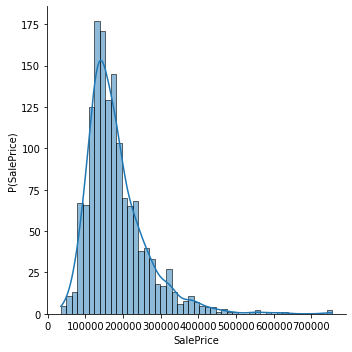

In [67]:
sns.displot(data=df_train['SalePrice'], kde=True).set(xlabel='SalePrice', ylabel='P(SalePrice)')

The last value is outliner, so they will have to be removed.

In [68]:
df_train=df_train[df_train['SalePrice']<700000]
df_train.reset_index(drop=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1454,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1455,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1456,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [69]:
new_train = df_train.select_dtypes(include = ['object']).copy()
new_train.shape

(1458, 43)

In [70]:
df_train.shape

(1458, 80)

In [71]:
#df_train.dropna(axis = 1, how = 'any', inplace = True)


In [72]:
df_train.shape

(1458, 80)

In [85]:
df_train.dtypes().head()

TypeError: 'Series' object is not callable

Open Dates can be converted to age of the restaurant and can be used.

In [74]:
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test).drop('Type_MB',axis=1)

KeyError: "['Type_MB'] not found in axis"

In [ ]:
revenue=df_train['revenue']
df_train=df_train.drop('revenue',axis=1)

In [ ]:
cols=np.array(df_train.columns)

In [ ]:
df_train.shape,df_test.shape

# 

# Random Forest Regression

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(df_train,revenue)

In [ ]:
predictions_rf = rf.predict(df_test)
pd.DataFrame(predictions_rf).to_csv('Random_forest_prediction.csv')

### Mean Square Error 

In [ ]:
mse_rf=mean_squared_error(revenue,rf.predict(df_train))
print(mse_rf)

### Decision tree graph 

In [ ]:
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = cols, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')


In [ ]:
graph.write_png('tree.png')

In [ ]:
rf.feature_importances_

In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(cols, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Column: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# 

# Multiple Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(df_train,revenue)

In [ ]:
predictions_mlr = lr.predict(df_test)
pd.DataFrame(predictions_mlr).to_csv('Multiple_linear_prediction.csv')

In [ ]:
mse_mlr=mean_squared_error(revenue,lr.predict(df_train))
print(mse_mlr)

In [ ]:
for x in cols:
    plt.scatter(df_train[x], revenue, color = 'red')
    plt.plot(df_train[x], lr.predict(df_train), color = 'blue')
    plt.title('revenue vs '+x+' (Training set)')
    plt.xlabel(x)
    plt.ylabel('revenue')
    plt.show()

# 

# Polynomial Regression

In [ ]:
pr = PolynomialFeatures(degree = 4)

In [ ]:
train_poly = pr.fit_transform(df_train)
train_poly.shape, df_train.shape

In [ ]:
lr.fit(train_poly,revenue)

In [ ]:
prediction_pr=lr.predict(pr.fit_transform(df_test.head(5)))# Cannot do for the whole set, as the it takes 133GB of memory
pd.DataFrame(prediction_pr).to_csv('Polynimial_predictions.csv')

In [ ]:
mse_pr=mean_squared_error(revenue,lr.predict(train_poly))
print(mse_pr)

# 

# Decision Tree Regression

In [ ]:
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(df_train,revenue)

In [ ]:
predictions_dtr=dtr.predict(df_test)
pd.DataFrame(predictions_dtr).to_csv('Decision_Tree_predictions.csv')

In [ ]:
mse_dtr=mean_squared_error(revenue,dtr.predict(df_train))
print(mse_dtr)

# 


# Gradient Boosting Regression

In [ ]:
gbr= ensemble.GradientBoostingRegressor(n_estimators=1000)

In [ ]:
gbr.fit(df_train,revenue)

In [ ]:
predictions_gbr=gbr.predict(df_test)
pd.DataFrame(predictions_gbr).to_csv('Gradient_Boosting_predictions.csv')

In [ ]:
mse_gbr=mean_squared_error(revenue,gbr.predict(df_train))
print(mse_gbr)